# **NEURAL NETWORK**

Classifier on the Iris dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## 1-DATASET (Iris)

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df.shape

(150, 5)

## 2-PREPROCESSING

In [9]:
x = iris_df.iloc[:, :4].values   # Features
y = iris_df['class'].values      # Labels  

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# Normalization, Encoding, train/test split

def normalize(x):
    std = x.std(axis=0)
    mean = x.mean(axis=0)
    return (x-mean)/std

def one_hot_encoding(y):
    n_classes = np.max(y)+1
    return np.eye(n_classes)[y]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = normalize(x_train)
x_test = normalize(x_test)
y_train = one_hot_encoding(y_train)
y_test = one_hot_encoding(y_test)


In [11]:
x_test

array([[ 0.14443512, -0.63451517,  0.45110832, -0.07943674],
       [-0.33701527,  2.00929805, -1.2060243 , -1.20827465],
       [ 2.07023667, -1.16327782,  1.66633891,  1.30025404],
       [ 0.02407252, -0.37013385,  0.34063282,  0.29684256],
       [ 0.98697329, -0.63451517,  0.50634608,  0.17141613],
       [-0.69810306,  0.95177276, -1.3164998 , -1.08284822],
       [-0.45737787, -0.37013385, -0.15650697,  0.04598969],
       [ 1.10733589,  0.15862879,  0.67205934,  1.30025404],
       [ 0.26479771, -2.22080311,  0.34063282,  0.29684256],
       [-0.21665267, -0.8988965 ,  0.00920629, -0.07943674],
       [ 0.6258855 ,  0.42301012,  0.67205934,  0.92397473],
       [-1.42027864, -0.10575253, -1.37173756, -1.45912752],
       [-0.57774046,  1.21615408, -1.42697531, -1.33370109],
       [-1.29991605,  0.15862879, -1.3164998 , -1.45912752],
       [-1.05919085,  2.00929805, -1.3164998 , -1.20827465],
       [ 0.38516031,  0.68739144,  0.45110832,  0.422269  ],
       [ 0.6258855 , -0.

## 3-NET

The net is composed by the input layer, two hidden layer, and the output layer:

$$ \begin{align*}
\underset{(120, 4)}{X} \underset{(4, 8)}{W_1} + \text{b}_1 = \underset{(120, 8)}{z_1} \\
\phi_\text{ReLu} (z_1)= \underset{(120, 8)}{A_1} \\
\underset{(120, 8)}{A_1} \underset{(8, 8)}{W_2} + \text{b}_2 = \underset{(120, 8)}{z_2} \\
\phi_\text{ReLu} (z_2)= \underset{(120, 8)}{A_2} \\
A_2 \underset{(8, 3)}{W_3} + \text{b}_3 = \underset{(120, 3)}{\hat z} \\
\phi_\text{softmax} (\hat z)= \underset{(120, 3)}{\hat y}
\end{align*}$$

In [12]:
max_epochs = 200

dim_input = 4
dim_hidden1 = 8
dim_hidden2 = 8
dim_output = 3  # Setosa, Versicolor, Virginica

learning_rate = 0.1

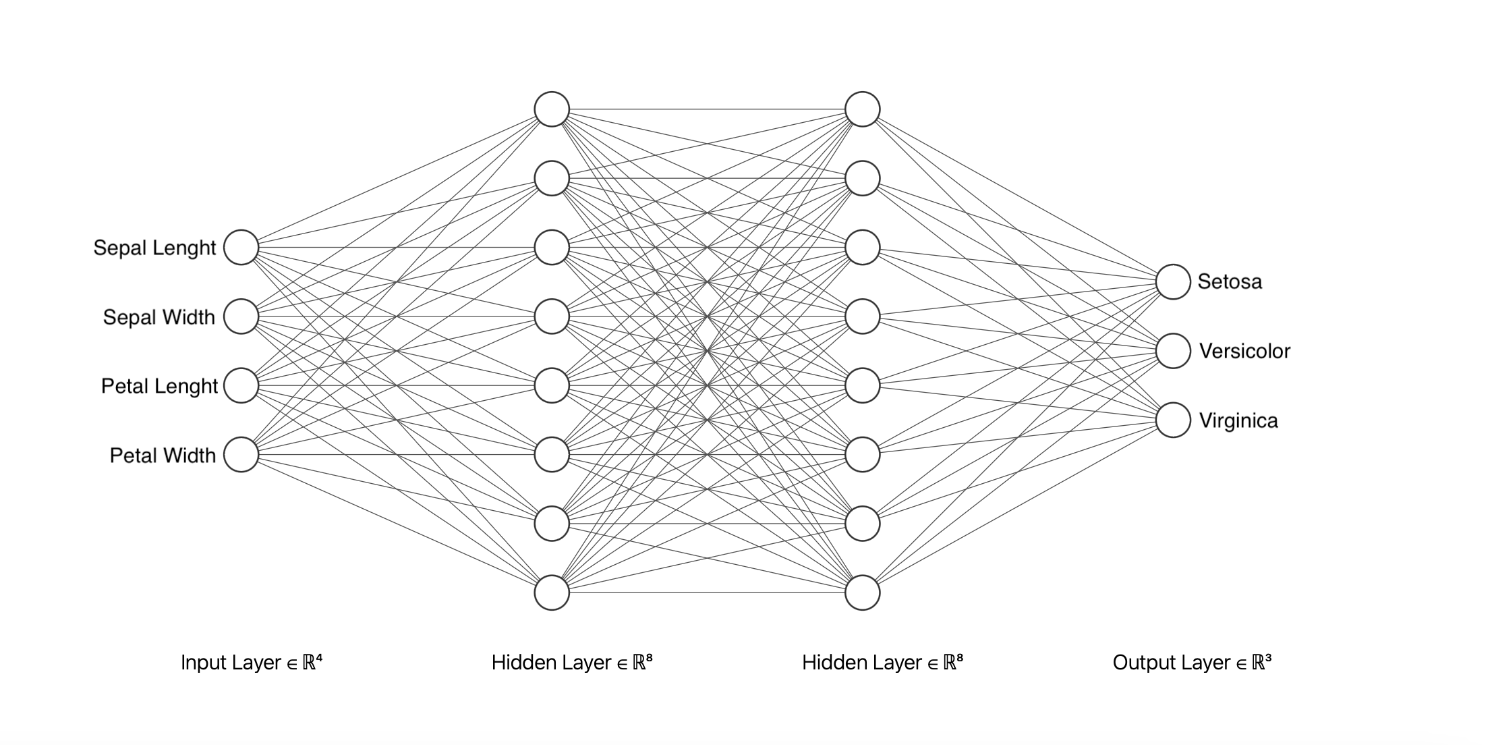

In [13]:
class Layer:
    
    def __init__(self, n_input, n_neurons):
        self.weights = np.random.randn(n_input, n_neurons) * np.sqrt(2.0 / n_input)
        self.bias   = np.zeros((1, n_neurons))

    def forward_propagation(self, inputs):
        self.inputs = inputs
        self.output = np.dot(self.inputs, self.weights) + self.bias
        return self.output

hidden_layer_1 = Layer(dim_input, dim_hidden1)
hidden_layer_2 = Layer(dim_hidden1, dim_hidden2)
output_layer   = Layer(dim_hidden2, dim_output)

Example, weight and bias for Hidden 1:

$$
W_1=
\begin{bmatrix}
w^{(1)}{1,1} & w^{(1)}{1,2} & \dots & w^{(1)}_{1,4} \\
w^{(1)}{2,1} & w^{(1)}{2,2} & \dots & w^{(1)}_{2,4} \\
\vdots & \vdots & \ddots & \vdots \\
w^{(1)}{8,1} & w^{(1)}{8,2} & \dots & w^{(1)}_{8,4}
\end{bmatrix}

\qquad

\mathbf{b}_1=
\begin{bmatrix}
b^{(1)}_{1} & b^{(1)}_2 & \dots & b^{(1)}_{8}
\end{bmatrix}
={\mathbf{0}}
$$

Let's define the activation functions, ReLU and Softmax:

$$\phi_{\text{R}} (x) = \begin{cases}
0 & \text{if } x < 0 \\
x & \text{if } x \geq 0
\end{cases}; \quad \phi_{\text{S}} (x) = \frac{e^{x_i}}{\sum e^{x_j}} $$

In [14]:
def ReLu(z):
    return np.maximum(0,z)

def softmax(z):
    exp_z = np.exp(z-np.max(z,   axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def ReLU_derivative(z):
    return (z > 0).astype(float) 

As loss function we'll use the cross-entropy:

$$ 
J(\hat{y}, y)
= - \frac{1}{n}
\sum_{k=1}^{n_{\text{obs}}} \sum_{c=1}^{C}
y_{k,c} \, \log\big(\hat{y}_{k,c}\big)
$$

In [16]:
def cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

Derivatives for backward propagation:

$$
\begin{align*}
\frac{\partial J}{\partial \hat z} &= \hat y - y \\
\frac{\partial \hat z}{\partial A_2} &= W_3^T, \quad \frac{\partial \hat z}{\partial W_3} = A_2^T; \quad \frac{\partial \hat z}{\partial \text{b}_3} = 1 \\
\frac{\partial A_2}{\partial z_2} &=
\begin{cases}
0 & \text{if } z_2 < 0 \\
1 & \text{if } z_2 \geq 0
\end{cases} \\
\frac{\partial z_2}{\partial A_1} &= W_2, \quad \frac{\partial z_2}{\partial W_2} = A_1^T; \quad \frac{\partial z_2}{\partial \text{b}_2} = 1 \\
\frac{\partial A_1}{\partial z_1} &=
\begin{cases}
0 & \text{if } z_1 < 0 \\
1 & \text{if } z_1 \geq 0
\end{cases} \\
\frac{\partial z_1}{\partial X} &= W_1^T; \quad \frac{\partial z_1}{\partial \text{b}_1} = 1 \\
\end{align*}
$$

So:

$$
\begin{align*}
\frac{\partial J}{\partial W_3} &= \frac{\partial J}{\partial \hat{z}} \cdot \frac{\partial \hat{z}}{\partial W_3} = \frac{\partial J}{\partial \hat{z}} \cdot A_2 = A_2^T \cdot \frac{\partial J}{\partial \hat{z}} \\
\frac{\partial J}{\partial W_2} &= \frac{\partial J}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2} = \left( \frac{\partial J}{\partial A_2} \odot \phi'_{\text{R}}(z_2) \right) \cdot A_1 = A_1^T \cdot \frac{\partial J}{\partial z_2} \\
\frac{\partial J}{\partial W_1} &= \frac{\partial J}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_1} = \left( \frac{\partial J}{\partial A_1} \odot \phi'_{\text{R}}(z_1) \right) \cdot X = X^T \cdot \frac{\partial J}{\partial z_1}
\end{align*}
$$

$$
\begin{align*}
\frac{\partial J}{\partial A_2} &= \frac{\partial J}{\partial \hat z} \frac{\partial \hat z}{\partial A_2} = (\hat y - y) \cdot W_3^T \\
\frac{\partial J}{\partial z_2} &= \frac{\partial J}{\partial A_2} \odot \phi{\prime}_{\text{R}}(z_2) \\
\frac{\partial J}{\partial A_1} &= \frac{\partial J}{\partial z_2} \cdot \frac{\partial z_2}{\partial A_1} = \frac{\partial J}{\partial z_2} \cdot W_2^T \\
\frac{\partial J}{\partial z_1} &= \frac{\partial J}{\partial A_1} \odot \phi{\prime}_{\text{R}}(z_1)
\end{align*}
$$

Update weights:

$$\begin{cases}
W_1 \leftarrow W_1 - \eta \frac{\partial J}{\partial W_1} \\
W_2 \leftarrow W_2 - \eta \frac{\partial J}{\partial W_2} \\
W_3 \leftarrow W_3 - \eta \frac{\partial J}{\partial W_3}
\end{cases}$$

For the biases, we are just multiplying the matrix for an all-ones array (the derivative), so it is like doing an internal sum.

$$A =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}; \quad
b' =
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix}$$

Example:


$$A \cdot b' =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
(1 \cdot 1) + (2 \cdot 1) + (3 \cdot 1) \\
(4 \cdot 1) + (5 \cdot 1) + (6 \cdot 1) \\
(7 \cdot 1) + (8 \cdot 1) + (9 \cdot 1)
\end{bmatrix}$$



## 4-TRAINING

In [17]:
def train(epochs, learning_rate,
          x_train, y_train, x_test, y_test, 
          hidden_layer_1, hidden_layer_2, output_layer):
    
    losses = []
    for epoch in range(epochs):

        z1 = hidden_layer_1.forward_propagation(x_train)
        A1 = ReLu(z1)
        z2 = hidden_layer_2.forward_propagation(A1)
        A2 = ReLu(z2)
        z_hat = output_layer.forward_propagation(A2)
        y_pred = softmax(z_hat)

        J = cross_entropy(y_pred, y_train)
        losses.append(J)

        # backward propagation
        n_obs = x_train.shape[0]

        # gradients output
        dJ_dzhat = (y_pred - y_train) / n_obs
        dJ_w3 = np.dot(A2.T, dJ_dzhat) 
        dJ_db3 = np.sum(dJ_dzhat, axis=0, keepdims=True) 
        dJ_dA2 = np.dot(dJ_dzhat, output_layer.weights.T)

        # gradients hidden 2
        dJ_dz2 = dJ_dA2 * ReLU_derivative(z2)
        dJ_dw2 = np.dot(A1.T, dJ_dz2) 
        dJ_db2 = np.sum(dJ_dz2, axis=0, keepdims=True) 
        dJ_dA1 = np.dot(dJ_dz2, hidden_layer_2.weights.T)

        # gradients hidden 1
        dJ_dz1 = dJ_dA1 * ReLU_derivative(z1)
        dJ_dw1 = np.dot(x_train.T, dJ_dz1)
        dJ_db1 = np.sum(dJ_dz1, axis=0, keepdims=True) 

        # update W and b
        output_layer.weights -= learning_rate * dJ_w3 
        hidden_layer_2.weights -= learning_rate * dJ_dw2
        hidden_layer_1.weights -= learning_rate * dJ_dw1

        output_layer.bias -= learning_rate * dJ_db3 
        hidden_layer_2.bias -= learning_rate * dJ_db2
        hidden_layer_1.bias -= learning_rate * dJ_db1

    return losses

losses = train(max_epochs, learning_rate, x_train, y_train, x_test, y_test, 
      hidden_layer_1, hidden_layer_2, output_layer)

In [21]:
def predict(x, hidden_layer_1, hidden_layer_2, output_layer):
    z1 = hidden_layer_1.forward_propagation(x)
    A1 = ReLu(z1)
    z2 = hidden_layer_2.forward_propagation(A1)
    A2 = ReLu(z2)
    z_hat = output_layer.forward_propagation(A2)
    y_pred = softmax(z_hat)
    
    return y_pred

y_pred_train = predict(x_train, hidden_layer_1, hidden_layer_2, output_layer)
y_pred_test  = predict(x_test,  hidden_layer_1, hidden_layer_2, output_layer)

## 5-PERFORMANCE

Final train loss: 0.0785
Train accuracy:   0.975
Test  accuracy:   0.967
Confusion matrix (test):
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


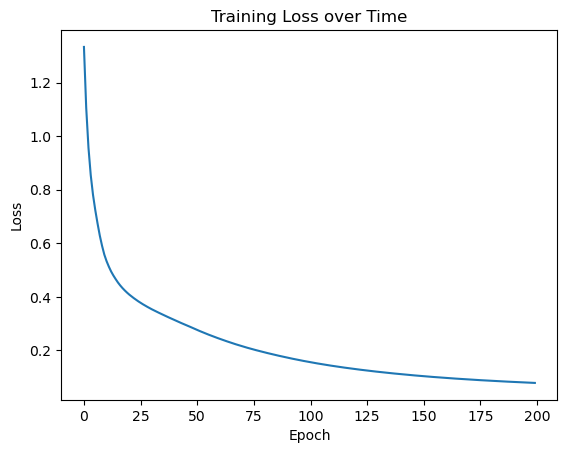

In [22]:
# 8. Resluts
def accuracy(y_prob, y_true):
    y_pred_cls = np.argmax(y_prob, axis=1)
    y_true_cls = np.argmax(y_true, axis=1)
    return np.mean(y_pred_cls == y_true_cls)

print(f"Final train loss: {losses[-1]:.4f}")
print(f"Train accuracy:   {accuracy(y_pred_train, y_train):.3f}")
print(f"Test  accuracy:   {accuracy(y_pred_test,  y_test):.3f}")

y_test_cls = np.argmax(y_test, axis=1)
y_hat_cls  = np.argmax(y_pred_test, axis=1)
print('Confusion matrix (test):')
print(confusion_matrix(y_test_cls, y_hat_cls))

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()